In [190]:
import pandas as pd

In [191]:
df_clientes_cadastrados = pd.read_csv("https://github.com/cmattosr/bootcampDS_mod06/raw/main/dados/clientes_cadastrados.csv")

In [192]:
df_clientes_cadastrados.shape

(438557, 18)

In [193]:
#Verificar se há clientes repetidos
df_clientes_cadastrados["ID_Cliente"].value_counts()

7045794    2
7636389    2
7046068    2
7052812    2
7742298    2
          ..
5709384    1
5727815    1
5729862    1
6780485    1
6293503    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [194]:
#Há clientes repetidos neste dataframe (ID_Cliente)

#Verificar se ha linhas duplicadas (utilizamos o sum, se houver duplicatas será somado o valor 1 para cada ocorrência)
df_clientes_cadastrados.duplicated().sum()

0

In [195]:
#não há linhas duplicadas

#verificar quanto são os clientes repetidos, o keep=False contabiliza todas as ocorrências com IDs iguais, o valor default True contabiliza apenas a duplicata
df_clientes_cadastrados[df_clientes_cadastrados["ID_Cliente"].duplicated(keep=False)].shape

(94, 18)

In [196]:
#Há 94 clientes repetidos (na verdade 47 aparecem duas vezes)
#Essas linhas serão removidas pois são irrelevantes considerando o total do dataframe (94 repetidos em 438557 linhas), mas serão armazenadas separadamente
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados["ID_Cliente"].duplicated(keep=False)]["ID_Cliente"]
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

## Desafio 01: Explorar o motivo pelo qual há clientes repetidos no dataframe

In [197]:
#remover as linhas com clientes repetidos, que já estão armazenados em id_repetidos
df_clientes_cadastrados_unicos = df_clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_unicos.shape

(438463, 18)

In [198]:
#checar se ainda há clientes repetidos
df_clientes_cadastrados_unicos["ID_Cliente"].value_counts()

6291456    1
6480139    1
6486280    1
5409030    1
6463747    1
          ..
6569516    1
6690720    1
6583845    1
6575649    1
6293503    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [199]:
#verificar se há valores nulos
df_clientes_cadastrados_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [200]:
#não há valores nulos

#analisar o dataframe
df_clientes_cadastrados_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

# Aula 02

## Desafio 02: Explorar as colunas (features), identificar se são contínuas, categóricas ou binárias

In [201]:
colunas_quantitativas = ["Idade", "Qtd_Filhos", "Rendimento_Anual", "Tamanho_Familia", "Anos_empregado"]

In [202]:
df_clientes_cadastrados_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Tamanho_Familia,Anos_empregado
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,2.194461,-165.936036
std,11.472815,0.724879,1.100832e+05,0.897194,380.201131
min,21.000000,0.000000,2.610000e+04,1.000000,-1000.700000
25%,34.000000,0.000000,1.215000e+05,2.000000,1.000000
50%,43.000000,0.000000,1.611000e+05,2.000000,4.000000
75%,53.000000,1.000000,2.250000e+05,3.000000,8.500000
max,69.000000,19.000000,6.750000e+06,20.000000,48.000000


In [203]:
df_clientes_cadastrados_unicos.query("Anos_empregado <= 0")[["Anos_empregado", "Categoria_de_renda"]].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

In [204]:
#provavelmente os clientes Pensionistas foram cadastrados como Anos_empregado = -1000.7, o que está distorcendo nossa coluna Anos_empregado
#vamos substituir esses valores por um valor mais interessante que ainda deixe claro que são Pensionistas
df_clientes_cadastrados_unicos["Anos_empregado"] = df_clientes_cadastrados_unicos["Anos_empregado"].replace(-1000.7, -1)

# Tratando Outliers

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

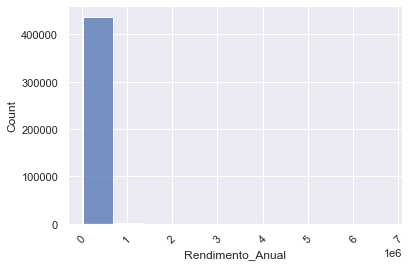

In [206]:
#verificar a distribuição dos Rendimentos Anuais no dataframe
sns.histplot(data=df_clientes_cadastrados_unicos, x="Rendimento_Anual", bins=10)
plt.xticks(rotation=45)
plt.show()

In [207]:
#essa visualização não é interessante porque os outliers estão impactando na visualização dos dados

#Vamos fazer o tratamento dos outliers

#vamos isolar a coluna de Rendimentos_Anuais
coluna = df_clientes_cadastrados_unicos["Rendimento_Anual"]

#calcular a média dos Rendimentos anuais
coluna_media = coluna.mean()
coluna_std = coluna.std()

#calcular o limite superior (média mais duas vezes o desvio padrão)
limite_sup = coluna_media + (coluna_std * 2)

#calcular o limite inferior (média menos duas vezes o desvio padrão)
limite_inf = coluna_media - (coluna_std * 2)

#verificar quais clientes ultrapassam os limites superior e inferior
index_outliers = []
for index, valor in coluna.items():
    if valor > limite_sup or valor < limite_inf:
        index_outliers.append(index)
#quantidade de clientes outliers
len (index_outliers)


#calculamos os outliers através de um intervalo de confiança, neste caso utilizamos acima ou abaixo de 2 vezes o desvio padrão

12641

## Desafio 03: Explorar outras técnicas de identificar e tratar outliers

In [208]:
#criar um dataframe sem os outliers
df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_unicos.drop(index_outliers)

In [209]:
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [210]:
df_clientes_cadastrados_sem_outliers[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Tamanho_Familia,Anos_empregado
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,2.191683,5.744956
std,11.525400,0.723577,75033.530551,0.896300,6.736649
min,21.000000,0.000000,26100.000000,1.000000,-1.000000
25%,34.000000,0.000000,117000.000000,2.000000,1.000000
50%,43.000000,0.000000,157500.000000,2.000000,4.000000
75%,53.000000,1.000000,225000.000000,3.000000,8.500000
max,69.000000,19.000000,405000.000000,20.000000,48.000000


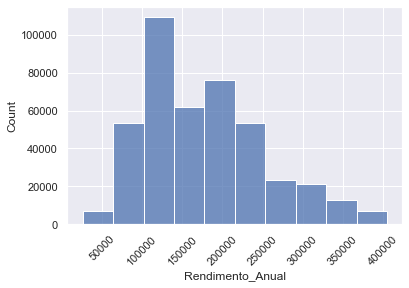

In [211]:
#verificar a distribuição dos Rendimentos Anuais no novo dataframe, sem outliers
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x="Rendimento_Anual", bins=10)
plt.xticks(rotation=45)
plt.show()

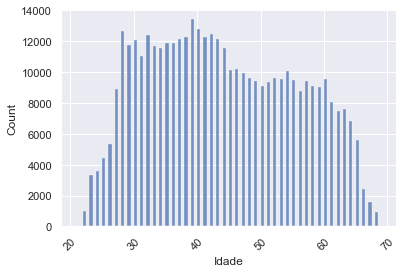

In [212]:
#verificar a distribuição da idade no novo dataframe, sem outliers
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x="Idade")
plt.xticks(rotation=45)
plt.show()

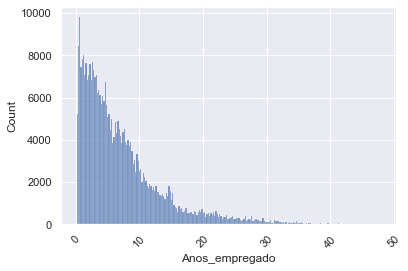

In [213]:
#verificar a distribuição dos Amnos Empregados no novo dataframe, sem outliers
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Anos_empregado > 0"), x="Anos_empregado")
plt.xticks(rotation=45)
plt.show()

## Variáveis Categóricas

In [214]:
df_clientes_cadastrados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425822 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             425822 non-null  int64  
 1   Genero                 425822 non-null  object 
 2   Tem_Carro              425822 non-null  int64  
 3   Tem_Casa_Propria       425822 non-null  int64  
 4   Qtd_Filhos             425822 non-null  int64  
 5   Rendimento_Anual       425822 non-null  float64
 6   Categoria_de_renda     425822 non-null  object 
 7   Grau_Escolaridade      425822 non-null  object 
 8   Estado_Civil           425822 non-null  object 
 9   Moradia                425822 non-null  object 
 10  Idade                  425822 non-null  float64
 11  Tem_Celular            425822 non-null  int64  
 12  Tem_telefone_trabalho  425822 non-null  int64  
 13  Tem_telefone_fixo      425822 non-null  int64  
 14  Tem_email              425822 non-nu

In [215]:
colunas_categoricas = ["Genero", "Tem_Carro", "Tem_Casa_Propria", "Categoria_de_renda", "Grau_Escolaridade", "Estado_Civil",
                       "Moradia", "Tem_Celular", "Tem_telefone_trabalho", "Tem_telefone_fixo","Tem_email", "Ocupacao"]

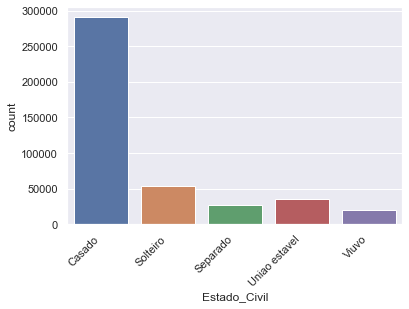

In [216]:
sns.countplot(x = "Estado_Civil", data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()
#a maioria dos clientes é casada

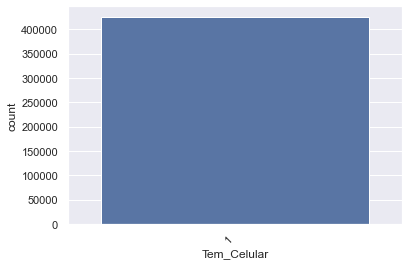

In [217]:
sns.countplot(x = "Tem_Celular", data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()
#todos os clientes têm celular

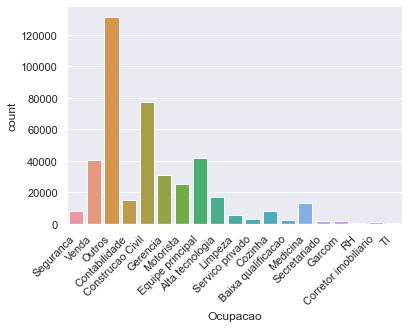

In [218]:
sns.countplot(x = "Ocupacao", data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()
#a maior barra é de Outros
#hipóteses: várias profissões estão contidas nessa categoria, ou apenas uma como "Educação", que não está disponível no dataset
#para isso vamos verificar a renda dessa coluna

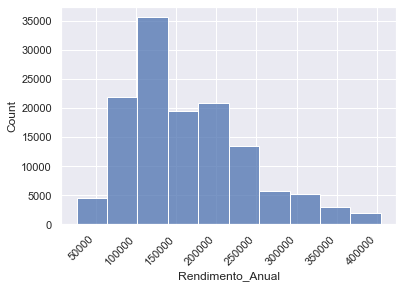

In [219]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Ocupacao == 'Outros'"), x="Rendimento_Anual", bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()
#a renda da categoria Outros é bem distribuída, aparentemente há várias Ocupações nessa categoria que não estão listadas no dataset

In [220]:
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [221]:
#como todos os clientes têm celular, vamos remover a coluna Tem_Celular
df_clientes_cadastrados_sem_outliers_tratamento1 = df_clientes_cadastrados_sem_outliers.drop("Tem_Celular", axis=1)
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 17)

In [222]:
#Por lei deveremos desconsiderar os seguintes dados sensíveis, que não podem ser considerados na hora de aprovar o crédito:
#Origem social e étnica
#Condições de Saúde
#Informação Genética
#Orientação Sexual
#Convicções políticas, religiosas e filosóficas

#Portando, vamos retirar a coluna Gênero
df_clientes_cadastrados_sem_outliers_tratamento1 = df_clientes_cadastrados_sem_outliers_tratamento1.drop("Genero", axis=1)
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 16)

In [223]:
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 16)

In [224]:
colunas_categoricas.remove("Genero")
colunas_categoricas.remove("Tem_Celular")
colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

## Desafio 02: Criar uma função para gerar novos gráficos

## Desafio 03: Continuar a análise exploratória dos dados

# Aula 03 *********************************************************

In [225]:
df_clientes_aprovados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [226]:
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [227]:
#neste dataset o mesmo cliente está em mais de uma linha
#vamos ver a quantidade de clientes aprovados
df_clientes_aprovados.ID_Cliente.value_counts().shape

(45985,)

In [228]:
#vamos comparar com a quantidade de clientes cadastrados no dataset de clientes cadastrados
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 16)

In [229]:
#vamos olhar alguns clientes aprovados
df_clientes_aprovados.query("ID_Cliente == 5001712")

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [230]:
df_clientes_aprovados.query("ID_Cliente == 5001711")

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [231]:
#vamos verificar quantas faixas de atraso há no dataset de clientes aprovados
df_clientes_aprovados.Faixa_atraso.value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

### como é calculado a abertura de crédito ?

### Criamos uma variavel para guardar os dados da váriavel df_registros_creditos agrupados por ID_Cliente, vamos dar o nome de df_registros_creditos_agrupados_ID, para agrupar usamos o método groupby.

### Depois vamos utilizar o método apply para iterar por cada ID_Cliente, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por linhas de um ID por vez, a logíca que vai ser aplicada é calcular, através da função min, o menor valor da coluna Mes_referencia.

### o retorno dessa função apply vai uma Serie de tamanho igual a quantidade de clientes que temos e vai guardar o menor valor Mes_referencia de cada cliente, vamos salvar isso na váriavel ser_abertura.

In [232]:
df_registros_creditos_agrupados_ID = df_clientes_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [233]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


### como é calculado o ultimo mês do crédito ?

### Novamente usamos a váriavel df_registros_creditos_agrupados_ID.

### Depois vamos utilizar o método apply para iterar por cada ID_Cliente, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por linhas de um ID por vez, a logíca que vai ser aplicada é calcular, através da função max, o maior valor da coluna Mes_referencia.

### o retorno dessa função apply vai uma Serie de tamanho igual a quantidade de clientes que temos e vai guardar o maior valor Mes_referencia de cada cliente, vamos salvar isso na váriavel ser_final.

In [234]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [235]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [236]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [237]:
#MOB (Month of Book): Along the columns, we use a dimension known as month on book (MOB). MOB is the number of months since 
#our vintages acquisition point. ... In our model, each rate is based on the cumulative number of customers who activated 
#over the total number of customers acquired in that vintage month.
#referência: https://charting-ahead.corsairs.network/vintage-analysis-a-visual-primer-490eff0dcb5a
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [238]:
#transformar a coluna Faixa_atraso em numérica
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}
                        
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


### como é definido a coluna Mau para atrasos maiores que 60 dias ?

### Vamos utilizar o método apply para iterar por cada linha do dataframe df_registros_creditos, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por uma linha de registro, a logíca que vai ser aplicada é um if que se a coluna Ind_Faixa_atraso tiver o valor maior que 3, indicando que existe um atraso maior que 60 dias ,retorna 1 e 0 caso o contrario.

### o retorno dessa função apply vai uma Serie e vai guardar 1 representando que aquele cliente foi um mau pagador naquele periodo ou 0 caso o cliente não tenha sido o mau pagador, vamos salvar estes valores em uma nova coluna chamada Mau.

In [239]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


### como é definido as informações calculadas por ID ?

### Primeiro vamos utilizar os colchetes para ter apenas as colunas de interesse ID_Cliente ,Abertura , Final, Janela e o que essas colunas tem de especial é que elas tem os mesmo valores para um determinado ID (cliente) idependente do periodo.

### Depois utilizamos novamente o groupby para unir as linhas com o mesmo ID e utilizamos tambem o apply para aplicar uma logica em cada ID e essa logica vai ser pega o primeiro registro X.iloc[0], lembra que disse que essas colunas tinham o mesmo valor sempre, então podemos pegar qualquer uma, no caso optei pela primeira.

### Por fim usamos o reset_index para o nosso ID voltar a ser uma coluna e salvamos esse novo DataFrame na váriavel df_registros_creditos_ID

In [240]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente','Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


### Como calcular a quantidade clientes por mês de abertura de crédito ?

### Primeiro utilizamos o groupby no nosso DataFrame, df_registros_creditos_ID, na coluna de Abertura, o que isso faz é unir todos os clientes de acordo com a época que a conta foi aberta.

### O proximo passo foi usar a método apply que vai iterar por todos valores de abertura de conta e aplicar a nossa função lambda, está por sua vez vai acessa a coluna ID_Cliente e aplicar o método count, na pratica o que vamos ter é a quantidade clientes de clientes que abriram contas naquele determinado valor de abertura.

### Por fim vamos utilizar o reset_index para recuperarmos a coluna Abertura

In [241]:
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura','Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


### Como calcular a quantidade clientes considerando Abertura e MOB ?

### Mesma logica da operação anterior, mudando apenas que agora que utilizamos o groupby no nosso DataFrame, df_registros_creditos_ID, na coluna de Abertura e na MOB, o que isso faz é unir todos os clientes de acordo com a época que a conta foi aberta e o mês no livro.

In [242]:
df_vintage = df_clientes_aprovados.groupby(['Abertura','MOB']).apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


### Agora vamos começar a estrtura da DataFrane Vintage.

### Vamos utilizar o merge para unir o df_vintage, colunas Abertura e o df_denominador, utilizando a coluna Abertura para unir as informações.

### Salvamos esse novo DataFrame na váriavel df_vintage

In [243]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on = ['Abertura'], how = 'left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


### Calculando a taxa de maus considerando Abertura e MOB

### Vamos precisar primeiro criar uma coluna nova no DataFrame df_vintage, chamada Qtd_Mau e ela vai armazenar a quantidade de clientes maus em um determinado periodo.

### Utilizamos o np.nan para preencher essa coluna apenas com valores nulos

### Agora vamos utilizar um for para iterar por todas os possiveis meses de Abertura, que vão de -60 até 0.

### Tambem vamos precisa criar uma lista para armazenar os ids que cumprirem os requisitos, classificado como mau e ter MOB igual a i e Abertura igual a j, vamos chamar essa lista de ls.

### Agora precisamos de segundo for para iterar pelas possibilidades de MOB, que vão de 0 até 60.

### Vamos utilizar o query para filtrar os apenas os IDs que forem classificados como mau e ter MOB igual a i e Abertura igual a j, transformar em lista com list e salvamos na variavel due.

### Vamos unir a lista due com a lista ls utilizando o método extend.

### Utilizando o set vamos garantir o ID apareça apenas uma vez e o len para calcular a quantidade de IDs unicos. Salvamos esse valor na coluna Qtd_Mau na linha de MOB igual a i e Abertura igual a j.

### Depois de percorrer todas as combinações de MOB e Abertura vamos dividir a quantidade de Ids Mau pela quantidade de Clientes e salvamos esses valores em uma nova coluna chama Taxa_de_Mau.

In [244]:
import numpy as np

In [245]:
df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [246]:
df_vintage_pivot = df_vintage.pivot(index = 'Abertura',
                             columns = 'MOB',
                             values = 'Taxa_de_Mau')

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1 - Para construir esse gráfico geramos uma lista valores de 0 até 60.

### 2 - Essa lista é necessaria para filtrar as colunas e depois utilizar o T (transpose).

### 3 - Por fim utilizamos o iloc para melhorar a visualização, filtrando apenas algumas datas de aberturas.

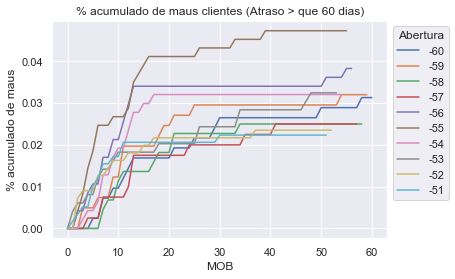

In [247]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

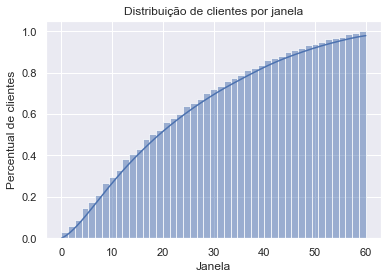

In [248]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

### 1. Primeiro criamos um dicionario com todas as possiveis faixas de atraso, onde a chave é a descrição da faixa e o valor é o indice da faixa.

### 2. Depois utilizamos um for para iterar pelo dicionario, para criar uma coluna para cada uma de nossas faixas.

### 3. Para determinar o valor dessas colunas utilizamos o apply, com uma função anônima que vai utilizar a lógica, se o ind da faixa de atraso for maior ou igual que o ind atual classificamos como mau, igual a 1, e caso for menor retornamos 0.

### 4. Depois de passar por todas as possibilidades o nosso DataFrame de créditos agora vai ter uma nova coluna de Mau para cada faixa de atraso.

In [249]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}
                        
for chave, valor in dict_intervalo_atraso.items():
      df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


### 1. Utilizando a mesma logica que utilizamos para calcular a taxa de mau para atrasos de 60 dias, só que agora aplicado a todas as faixas que determinamos.

###  2. Primeiro criamos um dicionario que vai ser o respoasavel por guardar todas as taxas de mau.

### 3. Depois armazenamos a quantidade de clientes na variável id_sum

### 4. Utilizando o for vamos iterar por cada uma das faixas de atraso do dict_intervalo_atraso.

### 5. Para o nosso calculo primeiro vamos determinar o menor MOB de todos clientes que tiveram classificação mau == 1 e salvar na variavel df_min_mau, para isso utilizamos o query para pegar apenas as linhas que tem a coluna Mau daquele determinada faixa com o valor igual 1. Depois unimos os dados de cada cliente utilizando o groupby, acessamos a coluna MOB e por fim utilizamos min para pegar o menor valor de MOB. (Utilizamos o reset_index para tranformar os IDs novamente em coluna)

### 6. Tambem vamos precisar de um dataframe, df_mob_taxa_mau, para salvar as taxa de mau por mob, esse DF vai ter uma coluna de MOB variando de 0 até 60 e uma coluna Taxa_Mau apenas com valores nulos.

### 7. Vamos precisar de uma variavel de apoio lst para armazenar os IDs.

### 8. Agora vamos utilizar o segundo for que vai iterar por todos os MOB, de 0 até 60.

### 9. Vamos utilizar a várivel due apenas como auxiliar, nela vamos armazenar temporariamente os IDs que forem daquele MOB. Logo em seguinda vamos incluir essa lista de IDs due na nossa lista principa lst.

### 10. Agora finalmente vamos armazenar calcular a taxa de mau, divindo a quantidade de Ids unicos na lista lst pela quantidade total de IDs, id_sum, vamos salvar esse valor na coluna Taxa_Mau na linha de MOB igual a i.

### 11. Depois de calcular todos as taxas, para cada MOB, salvamos a Series, df_mob_taxa_mau['Taxa_Mau'], no dicionario dict_taxa_mau na posição de uma determinada faixa de atraso.

### 12. Por fim transformamos esse dicionario em um DataFrame df_taxa_mau, onde as linhas vão ser os MOB e as colunas as taxas de mau de cada faixa de atraso.

In [250]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


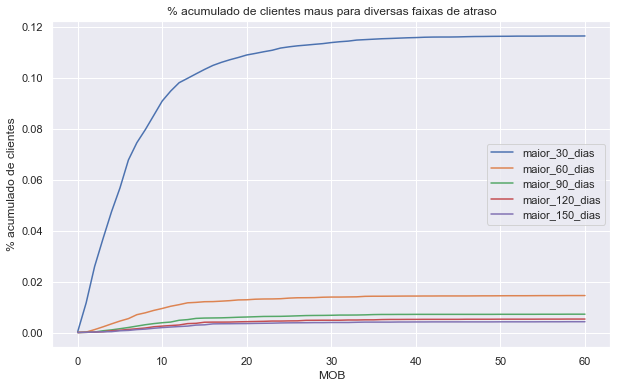

In [251]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

In [252]:
len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [253]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape
#estamos retirando os clientes que têm uma instabilidade na nossa base de dados

(943061, 14)

### 1. Vamos agrupar os clientes por ID e vamos utilizar o método apply para aplicar uma logica para cada ID, essa logica é definida na função verifica.

### 2. Essa função recebe os registros de cada cliente, salva todas as faixas de atraso na variavel lista_status.

### 3. Depois utilizamos o if para verificar se as faixas de atraso daquele ID contem alguma das faixas de atrasos determinadas, caso tenha retorna 1 e caso não retorna 0

### 4. Depois de aplicar em todos os ID, vamos utilizar o reset_index para ter a coluna de ID.

### 5. No final temos o DataFrame df_registros_creditos_id, com a coluna ID e a coluna Mau.

In [254]:
def verifica(registros):
    lista_status = registros['Faixa_atraso'].to_list()
    if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
        return 1
    else:
        return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [255]:
df_registros_creditos_id.shape

(30918, 2)

In [256]:
df_clientes_cadastrados_sem_outliers_tratamento1.shape

(425822, 16)

In [257]:
df_registro_clientes_targets = df_clientes_cadastrados_sem_outliers_tratamento1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [258]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100
#dataset desbalanceado

0    97.726673
1     2.273327
Name: Mau, dtype: float64

# Aula 04

In [259]:
colunas_categoricas_binarias = ['Tem_Carro', 'Tem_Casa_Propria', 'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email']
colunas_categoricas_binarias

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email']

In [260]:
colunas_categoricas_nao_binarias = ['Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil', 'Moradia', 'Ocupacao']
colunas_categoricas_nao_binarias

['Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Ocupacao']

In [261]:
#ordernar as colunas do dataset
df_registro_clientes_targets = df_registro_clientes_targets[['ID_Cliente'] + colunas_quantitativas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Tamanho_Familia,Anos_empregado,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,2.0,3.1,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,1.0,8.4,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,1.0,8.4,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,1.0,-1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,1.0,-1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


In [268]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [265]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix

from scipy import stats

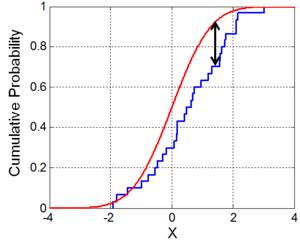


Modificação da função roda_modelo para utilizar a métrica KS.

1. Depois que já termos o modelo treinando, vamos calcular probabilidade do modelo classificar os dados como Mau para os dados de teste e salvar na váriavel data_mau.

2. Para isso utilizamos o método predict_proba nos dados de teste x_test, e depois aplicamos os slices para pegarmos apenas a possibilidade de uma das labels [:, 1], por fim ordenamos a probabilidade da maior para a menor.

3. Depois repetimos o mesmo processo para a variavel data_bom, mudando apenas o nosso slice [:, 0] para pegarmos agora a possibilidades da outra label.

4. Finalmente podemos utilizar o ks_2samp da biblioteca stats para calcular a métrica KS, vamos enviar as variaveis data_bom e data_mau para a função ks_2samp.

In [266]:
SEED = 1561651
def roda_modelo(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']
    
    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}")

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

In [267]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin


Criar a classe Transformador.

1. Primeiro vamos herdar as classes BaseEstimator e a TransdormerMixin.

2. Depois vamos criar o método construtor __init__ e vamos criar uma assinatura com os parametros colunas_continuas e colunas_categoricas. Vamos atribuir essas parametros a variaveis de mesmo nome.

3. Outro ponto foi que vamos instanciar o OneHorEnconder e o MinMaxScaler, criando assim os métodos enc e o scaler.

4. O proximo método que devemos criar é o fit e ele já tem sua assinatura padrão que é receber os variaveis X e y. Dentro do fit nosso objetivo é treinar nossos trasformadores enc e scaler com seus respectivos dados categoricos para o enc e continuos para o scaler. Vamos fazer isso novamente utilizando o slice na vairavel X, utilizando como parametro o atributos self.colunas_categoricas para o self.enc.fit e self.colunas_continuas para o self.scaler.fit.

5. O ultimo método é o transform e o que vamos fazer nele é aplicar as transformações, novamente tomando o cuidado de utilizar o slice para pegarmos apenas os dados coerentes para cada transformador self.enc.transform(X[self.colunas_categoricas]), e depois criar um DataFrame com os novos dados transformados.

6. Repetimos o mesmo processo para as colunas continuas, self.scaler.transform(X[self.colunas_continuas], e tambem criando o novo DataFrame X_continuas.

7. Agora que temos os dataframes com nossos dados transformados podemos unificar eles com o pd.concat e retorna o novo DataFrame com o return X

In [269]:
# PEP8 padrão CamelCase
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_continuas, colunas_categoricas):
        self.colunas_continuas = colunas_continuas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_continuas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_continuas]),
                                  columns= self.colunas_continuas)
      
      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

In [270]:
from sklearn.pipeline import Pipeline

AUC 0.5
KS KstestResult(statistic=1.0, pvalue=0.0)


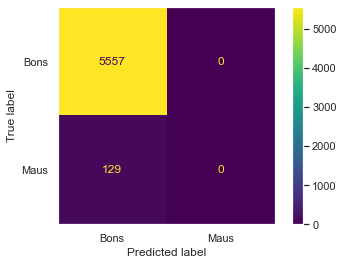


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [272]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', DummyClassifier(strategy='prior'))])   
roda_modelo(pipeline, df_registro_clientes_targets)

AUC 0.5847237857691884
KS KstestResult(statistic=1.0, pvalue=0.0)


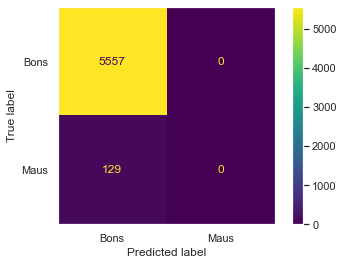


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [273]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

# Oversampling e undersampling

In [275]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

AUC 0.5811456463180038
KS KstestResult(statistic=0.1297924727400633, pvalue=3.867478870329459e-42)


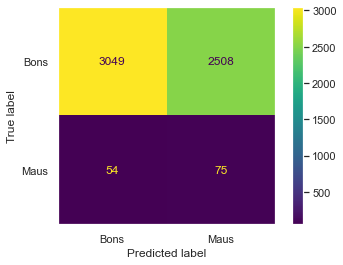


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.57      0.38      5686
weighted avg       0.96      0.55      0.69      5686



In [276]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

In [277]:
from sklearn.ensemble import RandomForestClassifier

AUC 0.825184521791776
KS KstestResult(statistic=0.9660569820612029, pvalue=0.0)


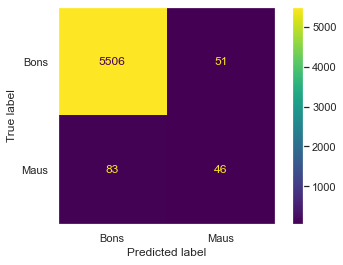


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.47      0.36      0.41       129

    accuracy                           0.98      5686
   macro avg       0.73      0.67      0.70      5686
weighted avg       0.97      0.98      0.97      5686



In [279]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

AUC 0.8338153010449841
KS KstestResult(statistic=0.9792472740063314, pvalue=0.0)


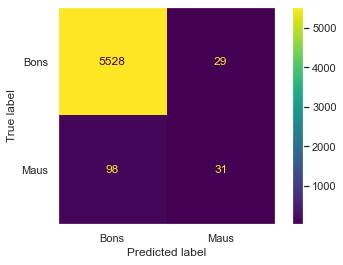


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [280]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)